In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Uso de integral (trapecio ya que converge más rápido)

def areaTrapecio(f,a,b,D,θ):
    return (b-a)*(f(a,D,θ)+f(b,D,θ))*(1/2)

def intTrapecio(f,a,b,n,D,θ):
    xx = np.linspace(a,b,n+1)
    integral = 0
    for i in range(n):
        integral = integral + areaTrapecio(f,xx[i],xx[i+1],D,θ)
    return integral

Ecuación amplitud que pasa en un punto $P(R,\theta)$:

$$ A(P) = \int_{ranura} A_{\ell} \frac{\exp i (\kappa(R+x\sin{\theta})-\omega t)}{R + x\sin{\theta}} \, dx \quad (1)$$

Intensidad en un punto $P$:

$$ I(P) = \frac{|A(P)|^2}{2} \quad (2)$$

In [86]:
#Definición de variables variables utilizadas en la anterior ecuación

Al = 10
λ = 5
k = (2*np.pi)/λ
ω = 10 #Opcional
t = 5 #Opcional
d = 3*λ
D = 10

def R(D,θ):
    return D/(np.cos(θ))

def amp(x,D,θ): #Amplitud
        return Al * ((np.e**(1j*(k*(R(D,θ)+x*np.sin(θ))))) / (R(D,θ) + np.sin(θ)) )

def suma(d,D,θ): #Integral de la amplitud ec (1)
    return intTrapecio(amp,-d/2,d/2,1000,D,θ)

def int(d,D,θ): #Intensidad ec. (2)
    return (abs(suma(d,D,θ))**2)/2

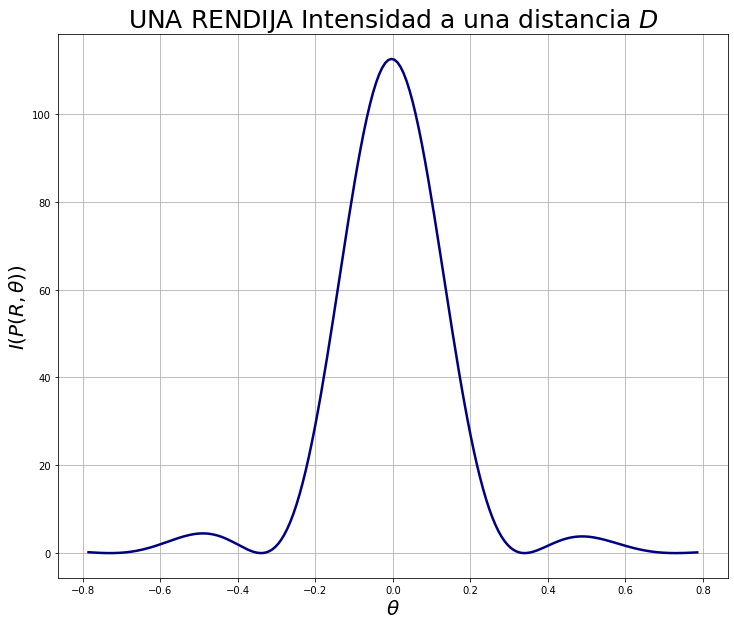

In [87]:
an = np.linspace(-np.pi/4,np.pi/4,200)
zz = [int(d,D,i) for i in an]


#Gráfica de la intensidad

plt.figure(figsize=(12,10))
plt.plot(an,zz,c="navy",lw=2.5)
plt.xlabel(r"$\theta$",size=20)
plt.ylabel(r"$I(P(R,\theta))$",size=20)
plt.title("UNA RENDIJA Intensidad a una distancia " + r"$D$", size=25)
plt.grid()
#plt.savefig("IG!.png",bbox_inches='tight')

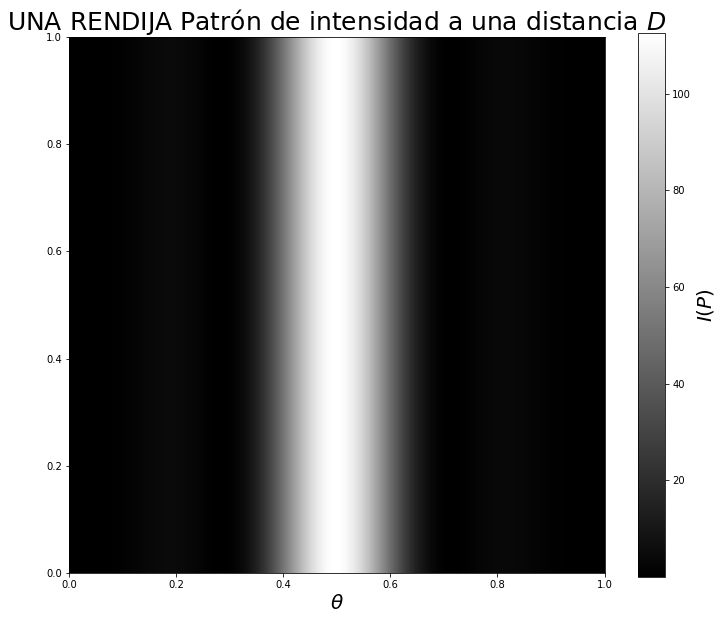

In [79]:
#Representación imshow de la intensidad (1D)
m1 = np.empty((0, 200))
m1 = np.append(m1, np.array([zz]), axis=0)

plt.figure(figsize=(12,10))
plt.imshow(m1,extent=(0,1,0,1),cmap='seismic')
cbar = plt.colorbar()
cbar.set_label(r"$I(P)$", size=20)
plt.title("UNA RENDIJA Patrón de intensidad a una distancia " + r"$D$", size=25)
plt.xlabel(r"$\theta$",size=20)
plt.gray()
#plt.savefig("P1bc.png",bbox_inches='tight')

In [81]:
rr = np.linspace(100,200,200) #Distancia rendija-pared
zeros = np.zeros([200,200])

for i in range(len(an)):
    for l in range(len(rr)):
        zeros[i,l] = int(d,rr[l],an[i])

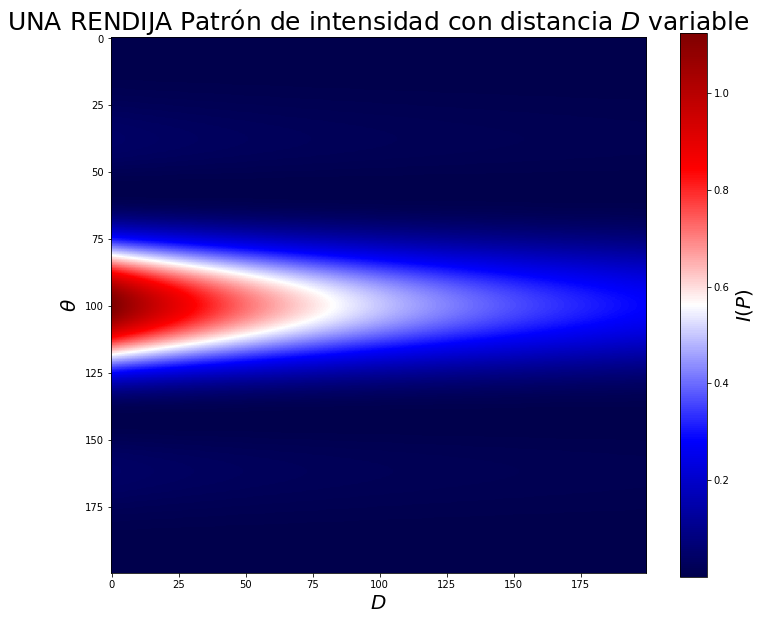

In [83]:
#Imshow de la intensidad respecto a la distancia de la rendija a la pared
plt.figure(figsize=(12,10))
plt.imshow(zeros,cmap='seismic')
cbar = plt.colorbar()
cbar.set_label(r"$I(P)$", size=20)
plt.title("UNA RENDIJA Patrón de intensidad con distancia " + r"$D$" + " variable", size=25)
plt.xlabel(r"$D$",size=20)
plt.ylabel(r"$\theta$",size=20)
#plt.gray()
plt.savefig("d2c.png",bbox_inches='tight')

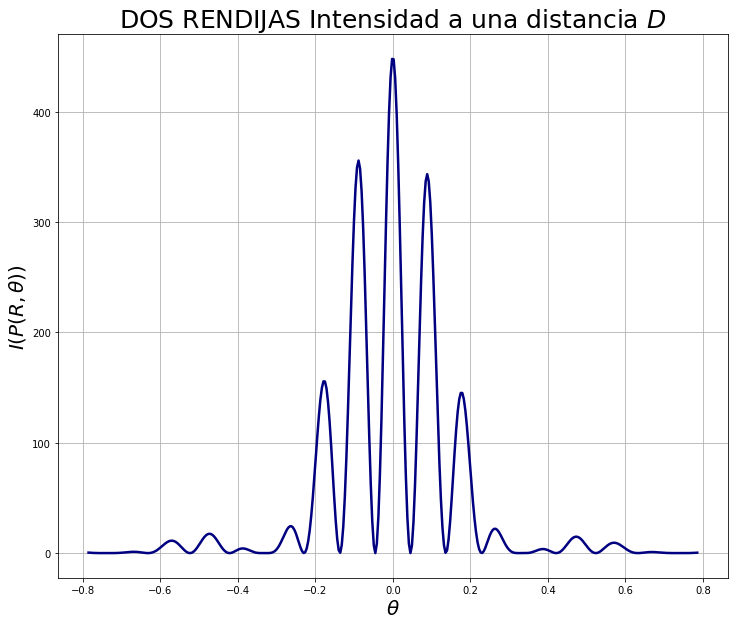

In [47]:
a = 55

def suma2(d,D,θ): #Integral de la amplitud ec (1)
    return intTrapecio(amp,-a/2-d/2,-a/2+d/2,1000,D,θ) + intTrapecio(amp,a/2-d/2,a/2+d/2,1000,D,θ)

def int2(d,D,θ): #Intensidad ec. (2)
    return (abs(suma2(d,D,θ))**2)/2

an = np.linspace(-np.pi/4,np.pi/4,200)
zz2 = [int2(d,D,i) for i in an]

#Gráfica de la intensidad

plt.figure(figsize=(12,10))
plt.plot(an,zz2,c="navy",lw=2.5)
plt.xlabel(r"$\theta$",size=20)
plt.ylabel(r"$I(P(R,\theta))$",size=20)
plt.title("DOS RENDIJAS Intensidad a una distancia " + r"$D$", size=25)
plt.grid()
plt.savefig("2r.png",bbox_inches='tight')

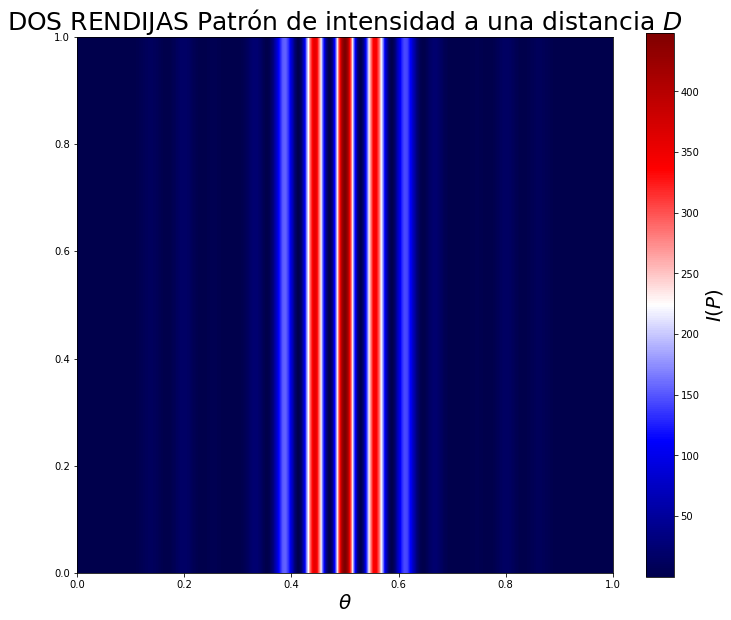

In [56]:
#Representación imshow de la intensidad (1D)
m2 = np.empty((0, 400))
m2 = np.append(m2, np.array([zz2]), axis=0)

plt.figure(figsize=(12,10))
plt.imshow(m2,extent=(0,1,0,1),cmap='seismic')
cbar = plt.colorbar()
cbar.set_label(r"$I(P)$", size=20)
plt.title("DOS RENDIJAS Patrón de intensidad a una distancia " + r"$D$", size=25)
plt.xlabel(r"$\theta$",size=20)
#plt.gray()
plt.savefig("p2c.png",bbox_inches='tight')

In [62]:
rr2 = np.linspace(100,200,200) #Distancia rendija-pared
zeros2 = np.zeros([200,200])

for i in range(len(an2)):
    for l in range(len(rr2)):
        zeros2[i,l] = int2(d,rr2[l],an2[i])

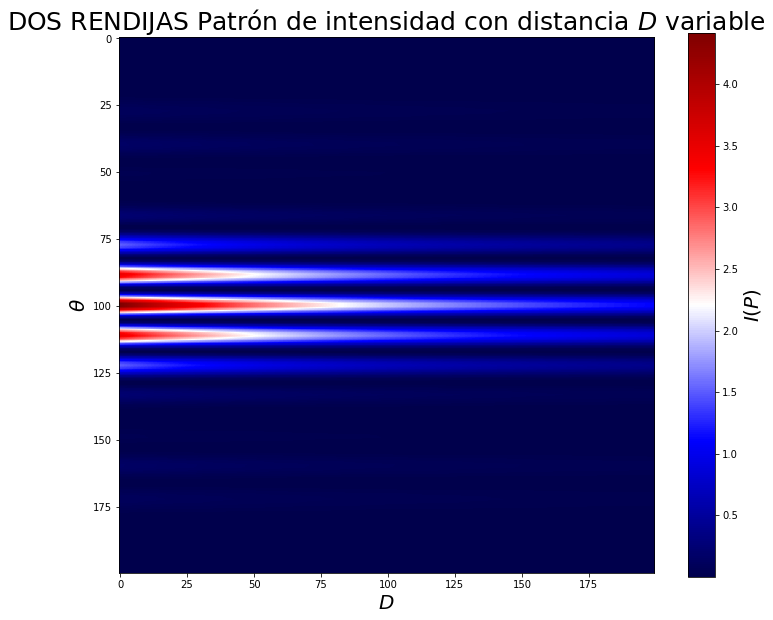

In [70]:
#Imshow de la intensidad respecto a la distancia de la rendija a la pared
plt.figure(figsize=(12,10))
plt.imshow(zeros2,cmap='seismic')
cbar = plt.colorbar()
cbar.set_label(r"$I(P)$", size=20)
plt.title("DOS RENDIJAS Patrón de intensidad con distancia " + r"$D$" + " variable", size=25)
plt.xlabel(r"$D$",size=20)
plt.ylabel(r"$\theta$",size=20)
#plt.gray()
plt.savefig("d3c.png",bbox_inches='tight')